In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the Data Set
df=pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# EDA

In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#Null Value checking 
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#checking the duplicate value
df.duplicated().sum()

0

In [9]:
#checkinng the correlation b/w unemployment and Weekly sales
df[['Unemployment','Weekly_Sales']].corr()

,Unemployment,Weekly_Sales
Unemployment,1.000000,-0.106176
Weekly_Sales,-0.106176,1.000000


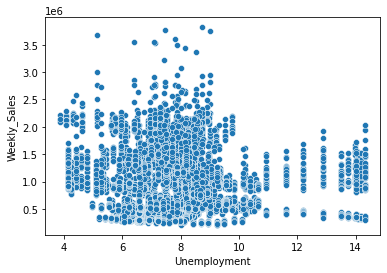

In [10]:
#ploting the scaterplot for cross check
sns.scatterplot(x=df['Unemployment'], y=df['Weekly_Sales']);

In [11]:
#selecting the relevent features for further process
sales= df.iloc[:,[0,2,7]]

In [12]:
sales

,Store,Weekly_Sales,Unemployment
0,1,1643690.90,8.106
1,1,1641957.44,8.106
2,1,1611968.17,8.106
3,1,1409727.59,8.106
4,1,1554806.68,8.106
...,...,...,...
6430,45,713173.95,8.684
6431,45,733455.07,8.667
6432,45,734464.36,8.667
6433,45,718125.53,8.667


In [14]:
#Take the total value of weekly sales and unemployment using groupby of store
sales=sales.groupby('Store') [['Weekly_Sales','Unemployment']].sum().reset_index()

In [15]:
sales.shape

(45, 3)

In [16]:
#takinng the minimun value of weekly sales
sales['Weekly_Sales'].min()

37160221.96

In [17]:
#filtrinng the dataframe with minmum  sales value
sales[(sales['Weekly_Sales']==37160221.96)]

,Store,Weekly_Sales,Unemployment
32,33,37160221.96,1220.241


In [18]:
sales['Weekly_Sales'].max()

301397792.46

In [19]:
#filtring the dataframe for maximum sales value
sales[(sales['Weekly_Sales']==301397792.46)]

,Store,Weekly_Sales,Unemployment
19,20,3.013978e+08,1054.112


In [20]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [21]:
#slecting the data for required featured
df[['Date','Weekly_Sales','Unemployment']]

,Date,Weekly_Sales,Unemployment
0,05-02-2010,1643690.90,8.106
1,12-02-2010,1641957.44,8.106
2,19-02-2010,1611968.17,8.106
3,26-02-2010,1409727.59,8.106
4,05-03-2010,1554806.68,8.106
...,...,...,...
6430,28-09-2012,713173.95,8.684
6431,05-10-2012,733455.07,8.667
6432,12-10-2012,734464.36,8.667
6433,19-10-2012,718125.53,8.667


In [22]:
#checking various stats of datafrme 
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [23]:
desc=df.describe()

In [24]:
#creating the data in int value
desc.astype(int)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435,6435,6435,6435,6435,6435
mean,23,1046964,0,60,3,171,7
std,12,564366,0,18,0,39,1
min,1,209986,0,-2,2,126,3
25%,12,553350,0,47,2,131,6
50%,23,960746,0,62,3,182,7
75%,34,1420158,0,74,3,212,8
max,45,3818686,1,100,4,227,14


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
#calculation of null value presentage 

df.isnull().sum() * 100 / len(df)

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [27]:
#checking the correlation of data
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [29]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [30]:
#sorting the datafrmae according to Date column
df=df.sort_values('Date',ascending=True)

In [31]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 5208 to 1763
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 452.5+ KB


In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581


In [34]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581


In [35]:
#creating the dataframe with reqd feature
temprature=df[['Store','Weekly_Sales','Temperature']]

In [36]:
#calucalating the total of Weekly sales and temprature
temprature=temprature.groupby('Store') [['Weekly_Sales','Temperature']].sum().reset_index()

In [37]:
#converting the data in interger form
temprature['Weekly_Sales']=temprature['Weekly_Sales'].astype(int)
temprature['Temperature']=temprature['Temperature'].astype(int)

In [38]:
temprature.head()

,Store,Weekly_Sales,Temperature
0,1,222402808,9767
1,2,275382440,9754
2,3,57586735,10215
3,4,299543953,8902
4,5,45475688,9925


In [39]:
#sorting the value as per weekly sales in ascending order
temprature=temprature.sort_values('Weekly_Sales',ascending=True)

In [40]:
#checking the correlating b/w temprature and weekly sales
temprature[['Weekly_Sales','Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.076393
Temperature,-0.076393,1.000000


In [41]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [42]:
#selection the reqd features
cpi=df[['Store','Weekly_Sales','CPI']]

In [43]:
#checking the unique value of CPI
cpi['CPI'].nunique()

2145

In [44]:
cpi.shape

(6435, 3)

In [45]:
#calculating the total of CPI and weekly sales
cpi=cpi.groupby('Store') [['Weekly_Sales','CPI']].sum().reset_index()

In [46]:
cpi.columns

Index(['Store', 'Weekly_Sales', 'CPI'], dtype='object')

In [47]:
#converting the value in intger
cpi['Weekly_Sales']=cpi['Weekly_Sales'].astype(int)
cpi['CPI']=cpi['CPI'].astype(int)

In [48]:
#checking the correlation b/w cpi and weekly sales
cpi[['Weekly_Sales','CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.076567
CPI,-0.076567,1.000000


In [ ]:
cpi.head()

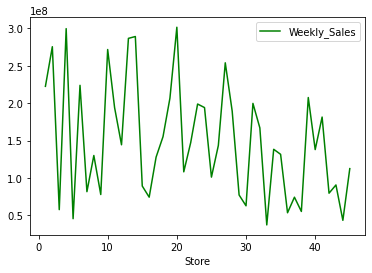

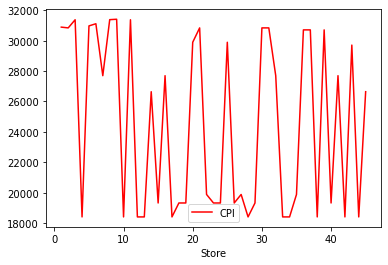

In [49]:
#comparing the value of sales value and CPI by bar plot
cpi.plot(x='Store',y="Weekly_Sales", kind="line",color='green')
cpi.plot(x='Store', y= "CPI",kind="line",color='red')

plt.show()

In [59]:
#calulating the top performing store in referance to Sales
cpi=cpi.sort_values('Weekly_Sales',ascending=False).reset_index()

<Figure size 1800x720 with 0 Axes>

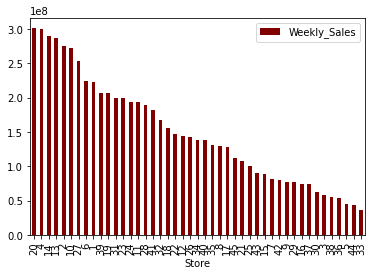

In [79]:
#calulating the top performing store in referance to Sales
plt.figure(figsize=(25,10))
cpi.plot(x='Store',y="Weekly_Sales", kind="bar",color='maroon')
plt.xticks(rotation=90)
plt.show()

In [80]:
301397792.46-37160221.96

264237570.49999997

# #model building

In [81]:
#importing the reqd library for time series model
import math

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.api as sm
from pylab import rcParams

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller #for Stationarity


import pmdarima as pm # Auto TimeSeries

from sklearn.metrics import mean_absolute_error, mean_squared_error #Error Metrics
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [82]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5208,37,01-04-2011,534578.78,0,67.31,3.524,213.577670,8.300
1204,9,01-04-2011,520962.14,0,56.12,3.524,218.445164,6.380
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
2634,19,01-04-2011,1305950.22,0,30.68,3.811,134.068258,7.658
6066,43,01-04-2011,611585.54,0,67.79,3.524,206.673311,10.581


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 5208 to 1763
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 452.5+ KB


In [84]:
#selecting the features for time series model prediction
df1=df[['Store','Date','Weekly_Sales']]
df1['Date'] = pd.to_datetime(df1['Date'])

In [85]:
#sorting the value as per date
df1=df1.sort_values('Date',ascending=True)

In [86]:
df1['Date'].nunique()

143

In [87]:
df1.head(20)

,Store,Date,Weekly_Sales
2608,19,2010-01-10,1379456.30
1464,11,2010-01-10,1182490.46
1607,12,2010-01-10,850936.26
5039,36,2010-01-10,422169.47
3752,27,2010-01-10,1543532.83
1893,14,2010-01-10,1855703.66
4467,32,2010-01-10,1061089.56
6326,45,2010-01-10,690007.76
3037,22,2010-01-10,905987.17
2465,18,2010-01-10,948977.50


In [88]:
#calulating the total sales
df1=df1.groupby('Date') [['Weekly_Sales']].sum()

In [89]:
df1.shape

(143, 1)

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-01-10 to 2012-12-10
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [91]:
df1.head()

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13


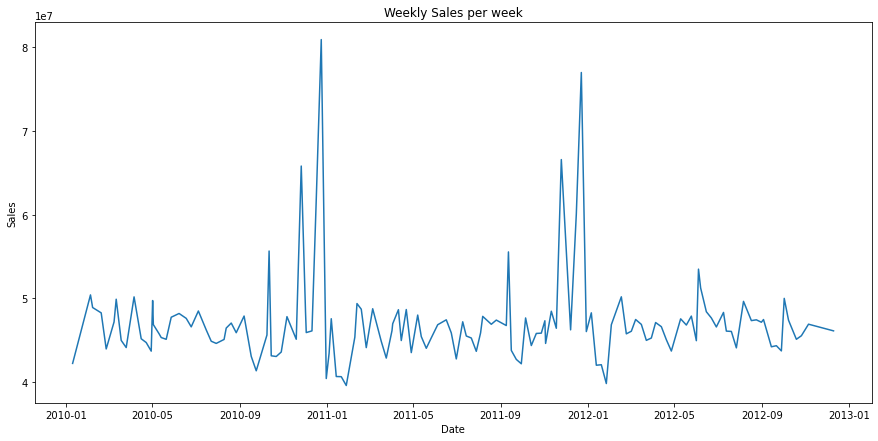

In [92]:
#ploting the data for checking trend and seasonality
plt.figure(figsize=(15,7))
plt.title("Weekly Sales per week")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(df1)
plt.show()

In [93]:
#spliting the data in train and test
df_train = df1[:130]
df_test = df1[130:]

In [94]:
df_train

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-07-09,48330059.31
2012-07-13,46099732.10
2012-07-20,46059543.45


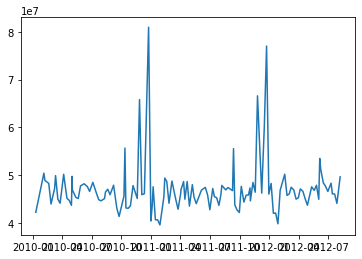

In [95]:
plt.plot(df_train)

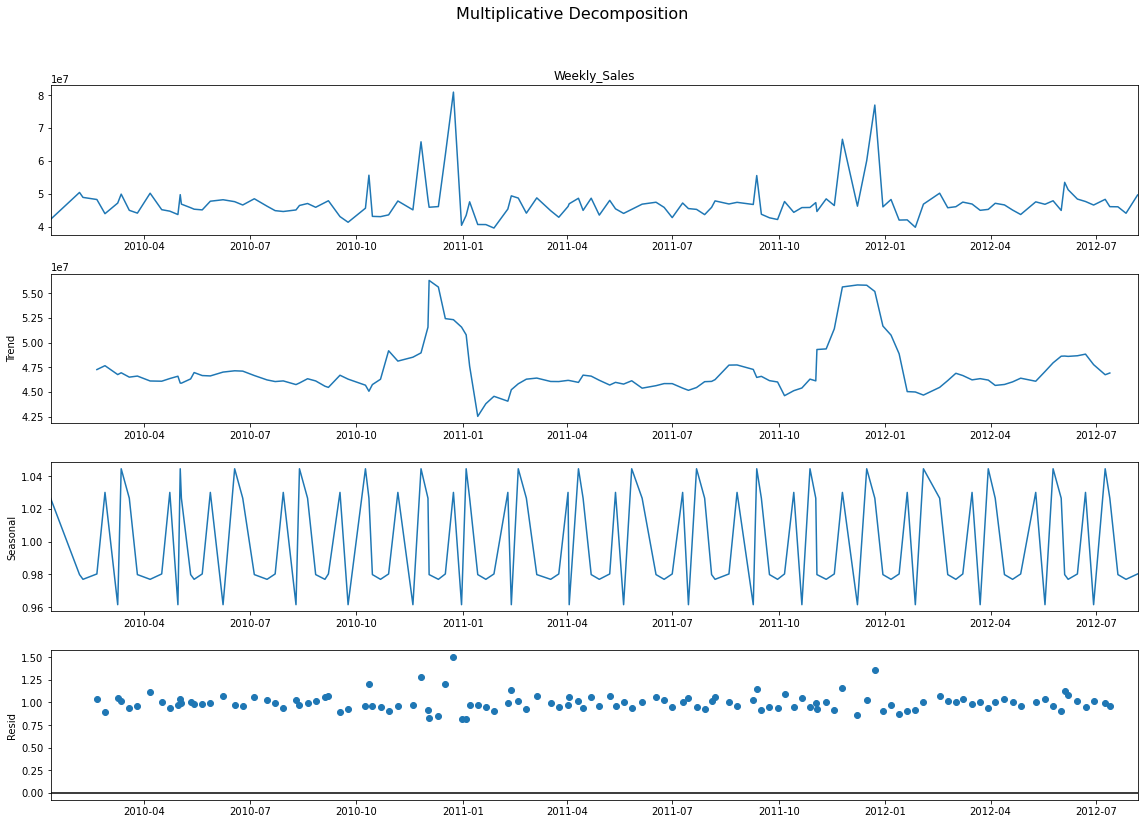

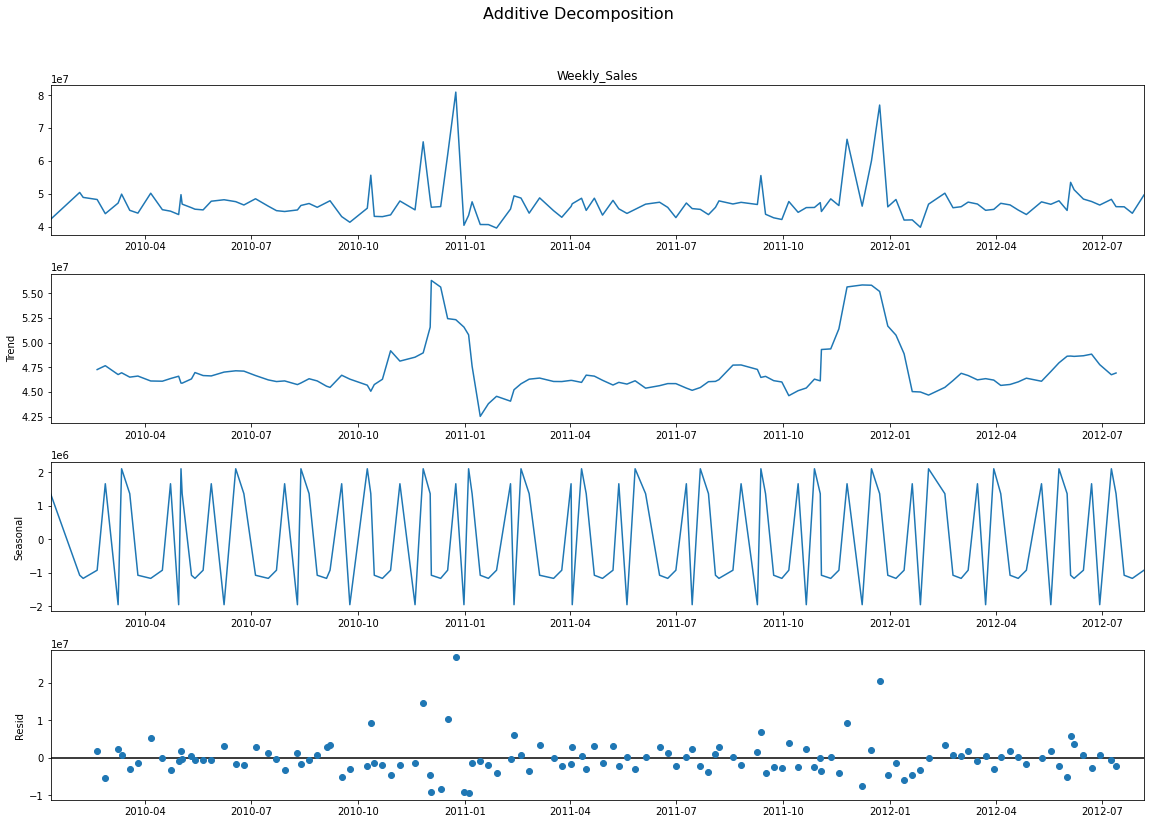

In [98]:
#checking the sesonality and tren with decomposing

from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_train['Weekly_Sales'], model='multiplicative', period=7)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_train['Weekly_Sales'], model='additive', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### function to check stationnarity

In [100]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Sales')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

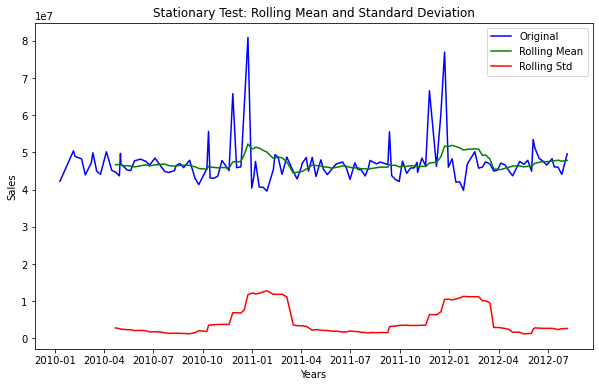

Results of Dickey-Fuller Test
Test Statistic                -9.371145e+00
p-value                        7.371804e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (1%)           -3.482088e+00
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
dtype: float64


In [101]:
stationarity_test(df_train)

#### by adf test we are getting the P value which is more than 0.05 we can assume our data is stationary

In [116]:
#using ARIMA model with parameter of 2,1,1 which has been calculated by autoarima
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order = (1,1,1)) 
results_ARIMA = model.fit()
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  130
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2202.657
Date:                Tue, 08 Nov 2022   AIC                           4411.314
Time:                        20:32:40   BIC                           4419.894
Sample:                             0   HQIC                          4414.800
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3500      0.063      5.524      0.000       0.226       0.474
ma.L1         -0.9788      0.040    -24.227      0.000      -1.058      -0.900
sigma2      3.877e+13        nan        nan        n

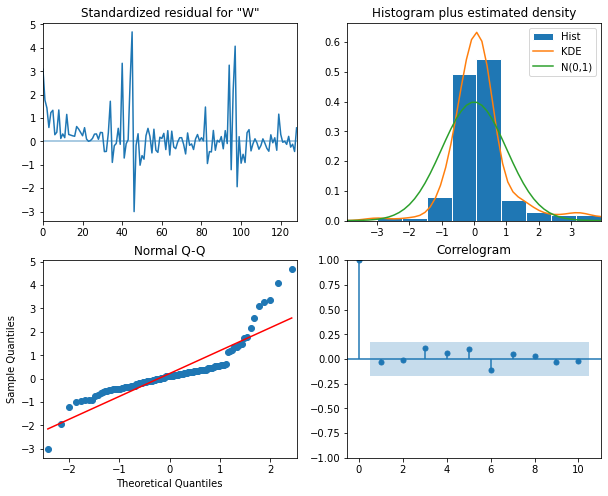

In [117]:
#ploting the result
results_ARIMA.plot_diagnostics(figsize=(10,8))
plt.show()

In [118]:
#saving the result in variable
pred = results_ARIMA.predict()

In [119]:
type(pred)

pandas.core.series.Series

In [120]:
#coverting the pred to dataframe
pred = pred.to_frame()
pred.head()

,predicted_mean
Date,
2010-01-10,0.000000e+00
2010-02-04,2.852107e+07
2010-02-07,3.676648e+07
2010-02-19,3.863954e+07
2010-02-26,4.000818e+07


In [121]:
#a simple fuction which calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [122]:
#checking the value of MPE and recceived acuracy of 8.133 whice is avarage we can accept this model
print("Train MAPE: ",mean_absolute_percentage_error(df_train.Weekly_Sales,pred.predicted_mean))

Train MAPE:  8.111072063073506


In [123]:
#saving the output in dataframe
forecast_test=pred.predicted_mean.to_frame()

In [124]:
forecast_test

,predicted_mean
Date,
2010-01-10,0.000000e+00
2010-02-04,2.852107e+07
2010-02-07,3.676648e+07
2010-02-19,3.863954e+07
2010-02-26,4.000818e+07
...,...
2012-07-09,4.698513e+07
2012-07-13,4.762039e+07
2012-07-20,4.680732e+07


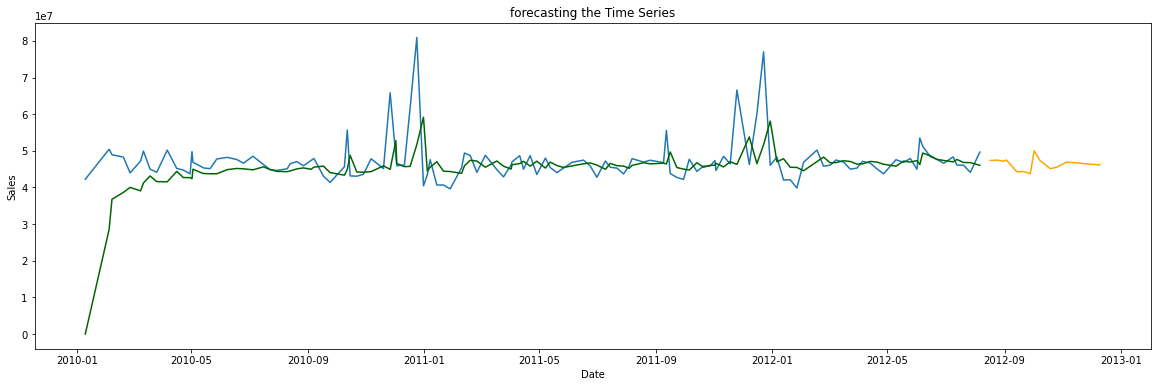

In [125]:
#ploting the result with bar graph to see the prediction and actual value
plt.figure(figsize= (20,6))
plt.plot(df_train.Weekly_Sales)
plt.plot(df_test.Weekly_Sales,color="orange")
plt.plot(forecast_test.predicted_mean,color="darkgreen")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('forecasting the Time Series');